In [111]:
import logging
import re
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np

In [112]:
ls /home/experiments/

errors.json  log.log


In [113]:
with open('/home/experiments/log.log', 'r') as f:
    data = f.readlines()

In [115]:
data[-50:]

["tensor([ 0.1730,  0.1995, -0.2427], device='cuda:0', requires_grad=True), Parameter containing:\n",
 "tensor([ 0.1023, -0.1015], device='cuda:0', requires_grad=True), Parameter containing:\n",
 "tensor([-0.0574,  0.0452,  0.0324], device='cuda:0', requires_grad=True)]\n",
 '[05/27 00:16:40] nl.defaults.trainer INFO: Epoch 97 done. Train accuracy: 94.13378, Validation accuracy: 93.13987\n',
 '[05/27 00:16:40] nl.optimizers.oneshot.darts.optimizer INFO: Arch weights (alphas, last column argmax): \n',
 '-0.082882, +0.081877, 1\n',
 '-0.291768, +0.292303, 1\n',
 '+0.044246, -0.044209, 0\n',
 '-0.108876, -0.140102, +0.158605, 2\n',
 '-0.096385, +0.094696, 1\n',
 '+0.412241, -0.412933, 0\n',
 '+0.173028, +0.199527, -0.242650, 1\n',
 '+0.102281, -0.101549, 0\n',
 '-0.057380, +0.045220, +0.032416, 1\n',
 '[05/27 00:16:41] nl.defaults.trainer INFO: Epoch 98-0, Train loss: 0.16101, validation loss: 0.19474, learning rate: [0.00012456723106801912]\n',
 '[05/27 00:16:46] nl.defaults.trainer INFO

In [125]:
def calculate_means(values):
    current_epoch = 0
    current_list = []
    output = []
    for epoch, metric in values:
        if epoch != current_epoch:
            output.append(np.mean(current_list))
            current_epoch = epoch
            current_list = [metric]
        else:
            current_list.append(metric)
    return output

def parse_log(file_name):
    metrics = {}
    
    with open(file_name, 'r') as f:
        data = f.readlines()
        
    results = defaultdict(list)
    for line in data:
        epoch = re.search(r'Epoch [0-9]+', line)
        train_acc = re.search(r'Train accuracy: [0-9]*[.]?[0-9]+', line)
        val_acc = re.search(r'Validation accuracy: [0-9]*[.]?[0-9]+', line)
        train_loss = re.search(r'Train loss: [0-9]*[.]?[0-9]+', line)
        val_loss = re.search(r'validation loss: [0-9]*[.]?[0-9]+', line)
        test_acc = re.search(r'top-1 = [0-9]*[.]?[0-9]+', line)

        if epoch is not None:
            epoch = int(epoch.group(0).split(' ')[-1])

        if train_acc is not None:
            train_acc = float(train_acc.group(0).split(' ')[-1])

        if val_acc is not None:
            val_acc = float(val_acc.group(0).split(' ')[-1])

        if train_loss is not None:
            train_loss = float(train_loss.group(0).split(' ')[-1])

        if val_loss is not None:
            val_loss = float(val_loss.group(0).split(' ')[-1])
        
        if test_acc is not None:
            test_acc = float(test_acc.group(0).split(' ')[-1])
            results['test_acc'] = test_acc

        if epoch is not None and train_acc is not None:
            results['train_acc'].append((epoch, train_acc))
            results['val_acc'].append((epoch, val_acc))

        if epoch is not None and train_loss is not None:
            results['train_loss'].append((epoch, train_loss))
            results['val_loss'].append((epoch, val_loss))
        
            
            
    metrics['train_acc'] = calculate_means(results['train_acc'])
    metrics['val_acc'] = calculate_means(results['val_acc'])
    metrics['train_loss'] = calculate_means(results['train_loss'])
    metrics['val_loss'] = calculate_means(results['val_loss'])
    metrics['test_acc'] = results['test_acc']
    
    return metrics

metrics = parse_log('/home/experiments/darts.log')

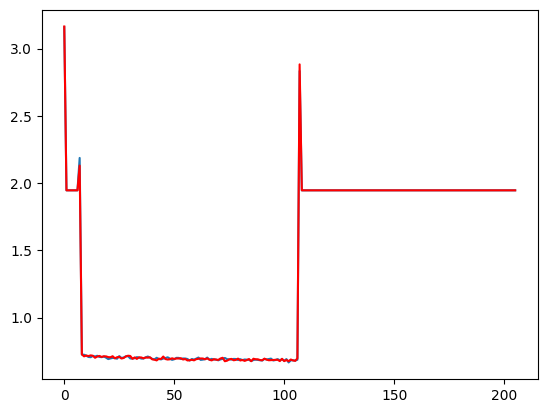

In [145]:
metrics = parse_log('/home/experiments/darts_new_new.log')
plt.plot(metrics['val_loss'])
plt.plot(metrics['train_loss'], color='red')

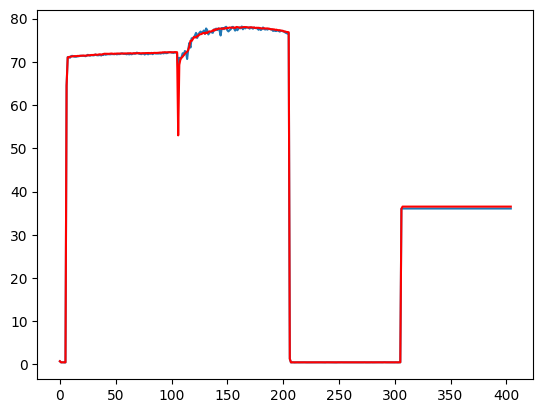

In [146]:
plt.plot(metrics['vall_acc'])
plt.plot(metrics['train_acc'], color='red')

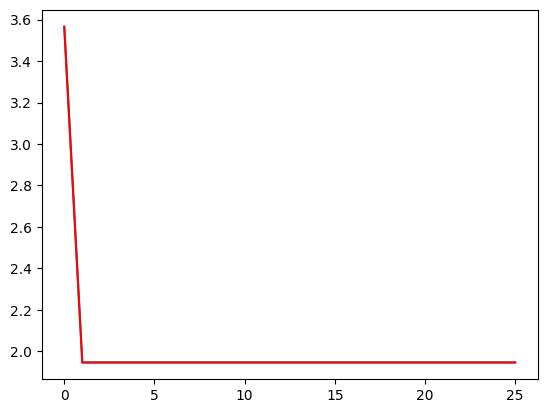

In [134]:
metrics = parse_log('/home/experiments/darts_new.log')
plt.plot(metrics['val_loss'])
plt.plot(metrics['train_loss'], color='red')